In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, plot_roc_curve

In [22]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [2]:
pd.pandas.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('revised_nft.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14461 entries, 0 to 14460
Data columns (total 34 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Unnamed: 0                                      14461 non-null  int64  
 1   id                                              14461 non-null  int64  
 2   token_id                                        14461 non-null  object 
 3   name                                            13698 non-null  object 
 4   traits                                          14461 non-null  object 
 5   description                                     10469 non-null  object 
 6   is_presale                                      14461 non-null  bool   
 7   asset_contract.created_date                     14461 non-null  object 
 8   asset_contract.name                             14461 non-null  object 
 9   asset_contract.total_supply            

In [5]:
df.describe()

,Unnamed: 0,id,asset_contract.total_supply,asset_contract.seller_fee_basis_points,asset_contract.dev_seller_fee_basis_points,asset_contract.opensea_seller_fee_basis_points,collection.dev_seller_fee_basis_points,collection.opensea_seller_fee_basis_points,target
count,14461.000000,1.446100e+04,1328.000000,14461.000000,14461.000000,14461.000000,14461.000000,14461.000000,14461.000000
mean,7230.000000,6.189012e+07,137.871235,386.151373,136.289676,249.861697,455.793790,249.861697,0.668004
std,4174.675456,4.724710e+07,1146.537191,247.060855,247.061572,5.878692,384.439182,5.878692,0.470946
min,0.000000,1.787230e+05,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3615.000000,1.706683e+07,0.000000,250.000000,0.000000,250.000000,250.000000,250.000000,0.000000
50%,7230.000000,5.714872e+07,0.000000,250.000000,0.000000,250.000000,250.000000,250.000000,1.000000
75%,10845.000000,1.118344e+08,0.000000,500.000000,250.000000,250.000000,1000.000000,250.000000,1.000000
max,14460.000000,1.190305e+08,10333.000000,1500.000000,1250.000000,250.000000,1500.000000,250.000000,1.000000


In [6]:
df = df.drop(['Unnamed: 0', 'id'], axis = 1)

#### Checking the object data type

In [7]:
df[[c for c in df.columns if df[c].dtype == 'object']].describe()

,token_id,name,traits,description,asset_contract.created_date,asset_contract.name,asset_contract.symbol,asset_contract.schema_name,asset_contract.asset_contract_type,asset_contract.nft_version,asset_contract.opensea_version,collection.created_date,collection.slug,collection.safelist_request_status,collection.description,collection.external_url,collection.image_url,collection.twitter_username,collection.instagram_username,collection.medium_username,collection.chat_url,creator.user.username,owner.address
count,14461,13698,14461,10469,14461,14461,13151,14461,14461,4734,7888,14461,14461,14461,12598,8240,13417,10905,3220,2118,1,12092,14461
unique,14461,11118,6723,8114,453,433,400,3,2,3,1,2164,2171,4,1723,956,1840,1203,668,139,1,2095,4085
top,1,Clayton Kershaw,[],The Toy Boogers collection is 100% handmade an...,2020-12-02 17:40:53.232025,OpenSea Collection,OPENSTORE,ERC1155,semi-fungible,3.0,2.0.0,2019-04-26 22:13:24.304778,dodgers-mlb-crypto,not_requested,The Los Angeles Dodgers and Lucid Sight are pr...,https://www.mlbc.app/dodgers,https://lh3.googleusercontent.com/bxTDkUWAgD_I...,MLBChampions,parallel_nft,rarible,https://discord.gg/FpN2ws6,0x3ee5c5f600a019a68a43c61e5966e0b3e8c6ce71,0x0000000000000000000000000000000000000000
freq,1,877,7073,126,7885,7885,7888,9729,9729,4680,7888,2426,2426,9918,2426,2426,2426,2426,170,1001,1,2433,9745


#### Baseline Understanding 

In [8]:
df['target'].value_counts(normalize=True)

1    0.668004
0    0.331996
Name: target, dtype: float64

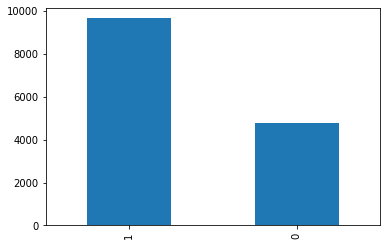

In [9]:
df['target'].value_counts().plot(kind='bar');

In [ ]:
# dropped the null values of the object type and token_id and the traits cos there is no standard 
# traits for each of this token.

In [10]:
df_obj = df.select_dtypes('object').dropna(axis=1)

In [11]:
df_obj.drop(['token_id', 'traits'], axis=1, inplace=True)

In [12]:
nft_df = pd.concat([df_obj, df.select_dtypes(['int64', 'float64', 'bool'])], axis=1)

In [13]:
nft_df.shape

(14461, 17)

<!--  -->

###  Train test split

In [14]:
X = nft_df.drop('target', axis=1)
y = nft_df['target']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [16]:
X_train.head(12)

,asset_contract.created_date,asset_contract.name,asset_contract.schema_name,asset_contract.asset_contract_type,collection.created_date,collection.slug,collection.safelist_request_status,owner.address,is_presale,asset_contract.total_supply,asset_contract.seller_fee_basis_points,asset_contract.dev_seller_fee_basis_points,asset_contract.opensea_seller_fee_basis_points,collection.featured,collection.dev_seller_fee_basis_points,collection.opensea_seller_fee_basis_points
1791,2020-05-27 16:53:32.834583,Rarible 1155,ERC1155,semi-fungible,2020-01-01 13:22:57.777065,rarible,approved,0x0000000000000000000000000000000000000000,False,NaN,250,0,250,False,0,250
8067,2020-12-02 17:40:53.232025,OpenSea Collection,ERC1155,semi-fungible,2021-11-20 22:00:44.082162,untitled-collection-15155546,not_requested,0x0000000000000000000000000000000000000000,True,NaN,250,0,250,False,0,250
9839,2020-12-02 17:40:53.232025,OpenSea Collection,ERC1155,semi-fungible,2021-11-21 07:31:31.489277,donald-trump-andy-warhol-style,not_requested,0x0000000000000000000000000000000000000000,True,NaN,250,0,250,False,1000,250
6886,2018-09-20 03:42:04.658841,Dodgers MLB Crypto,ERC721,non-fungible,2019-04-26 22:13:24.304778,dodgers-mlb-crypto,not_requested,0xcb32569a5ede5bcacaca7038ea9fbbad7c348895,False,NaN,500,250,250,False,250,250
3891,2018-09-25 09:54:55.173827,Hero,ERC721,non-fungible,2019-04-26 22:13:15.518921,hero,not_requested,0xd5768cb94634dea639f32078c4e82b5161a081fc,False,NaN,250,0,250,False,0,250
944,2020-10-12 16:25:20.228951,dontrug.me,ERC1155,semi-fungible,2020-10-12 16:32:31.348076,dontrug-me,verified,0x0000000000000000000000000000000000000000,False,NaN,1250,1000,250,False,1000,250
8868,2020-12-02 17:40:53.232025,OpenSea Collection,ERC1155,semi-fungible,2021-11-21 23:02:20.969452,secretcastle,not_requested,0x0000000000000000000000000000000000000000,True,NaN,250,0,250,False,800,250
4829,2018-09-20 03:42:04.658841,Dodgers MLB Crypto,ERC721,non-fungible,2019-04-26 22:13:24.304778,dodgers-mlb-crypto,not_requested,0x0172b9d9328da423cc9057fb264e7b309fcba797,False,NaN,500,250,250,False,250,250
5358,2018-09-20 03:42:04.658841,Dodgers MLB Crypto,ERC721,non-fungible,2019-04-26 22:13:24.304778,dodgers-mlb-crypto,not_requested,0xf302a0d506087cb6393ec1a97b0e69f47c3bcee5,False,NaN,500,250,250,False,250,250
875,2021-09-17 15:06:09.145889,AnimightiesJigScene,ERC1155,semi-fungible,2021-09-17 15:45:24.579657,animightiesjigscene,not_requested,0x0000000000000000000000000000000000000000,False,NaN,750,500,250,False,500,250


In [17]:
X_train.select_dtypes('int64')

,asset_contract.seller_fee_basis_points,asset_contract.dev_seller_fee_basis_points,asset_contract.opensea_seller_fee_basis_points,collection.dev_seller_fee_basis_points,collection.opensea_seller_fee_basis_points
1791,250,0,250,0,250
8067,250,0,250,0,250
9839,250,0,250,1000,250
6886,500,250,250,250,250
3891,250,0,250,0,250
...,...,...,...,...,...
5191,500,250,250,250,250
13418,750,500,250,500,250
5390,500,250,250,250,250
860,250,0,250,400,250


In [18]:
# converting the numerical variable
nft_impute = SimpleImputer(strategy='median')
x_train_int = nft_impute.fit_transform(X_train.select_dtypes(['int64', 'float64']))

In [19]:
nft_int_conv = pd.DataFrame(x_train_int, columns=X_train.select_dtypes(['int64', 'float64']).columns)

In [20]:
nft_int_conv.nunique()

asset_contract.total_supply                       21
asset_contract.seller_fee_basis_points            24
asset_contract.dev_seller_fee_basis_points        24
asset_contract.opensea_seller_fee_basis_points     2
collection.dev_seller_fee_basis_points            46
collection.opensea_seller_fee_basis_points         2
dtype: int64

In [21]:
# doing the same for the object
X_train.select_dtypes('object').isna().sum()

asset_contract.created_date           0
asset_contract.name                   0
asset_contract.schema_name            0
asset_contract.asset_contract_type    0
collection.created_date               0
collection.slug                       0
collection.safelist_request_status    0
owner.address                         0
dtype: int64

In [23]:
ordinal_obj = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=9999)
transformed_obj = ordinal_obj.fit_transform(X_train.select_dtypes('object'))

In [24]:
nft_or_encode = pd.DataFrame(transformed_obj, columns=X_train.select_dtypes('object').columns)

#### Joining the numerical and Object together for the X_train

In [25]:
train_conv_nft_df = pd.concat([nft_int_conv, nft_or_encode], axis=1)

In [26]:
train_conv_nft_df.head()

,asset_contract.total_supply,asset_contract.seller_fee_basis_points,asset_contract.dev_seller_fee_basis_points,asset_contract.opensea_seller_fee_basis_points,collection.dev_seller_fee_basis_points,collection.opensea_seller_fee_basis_points,asset_contract.created_date,asset_contract.name,asset_contract.schema_name,asset_contract.asset_contract_type,collection.created_date,collection.slug,collection.safelist_request_status,owner.address
0,0.0,250.0,0.0,250.0,0.0,250.0,32.0,280.0,1.0,1.0,31.0,1243.0,0.0,0.0
1,0.0,250.0,0.0,250.0,0.0,250.0,51.0,242.0,1.0,1.0,1573.0,1796.0,1.0,0.0
2,0.0,250.0,0.0,250.0,1000.0,250.0,51.0,242.0,1.0,1.0,1590.0,512.0,1.0,0.0
3,0.0,500.0,250.0,250.0,250.0,250.0,11.0,100.0,2.0,0.0,20.0,501.0,1.0,2806.0
4,0.0,250.0,0.0,250.0,0.0,250.0,12.0,160.0,2.0,0.0,14.0,739.0,1.0,2948.0


#### Convert Test Data

In [ ]:
# Doing the same preprocessing to the test data

In [27]:
x_test_int = nft_impute.transform(X_test.select_dtypes(['int64', 'float64']))

In [28]:
nft_int_conv_test = pd.DataFrame(x_test_int, columns=X_test.select_dtypes(['int64', 'float64']).columns)

In [29]:
X_test.select_dtypes('object').isna().sum()
X_test.nunique()

asset_contract.created_date                       147
asset_contract.name                               143
asset_contract.schema_name                          2
asset_contract.asset_contract_type                  2
collection.created_date                           646
collection.slug                                   647
collection.safelist_request_status                  4
owner.address                                     652
is_presale                                          2
asset_contract.total_supply                        13
asset_contract.seller_fee_basis_points             18
asset_contract.dev_seller_fee_basis_points         18
asset_contract.opensea_seller_fee_basis_points      2
collection.featured                                 2
collection.dev_seller_fee_basis_points             31
collection.opensea_seller_fee_basis_points          2
dtype: int64

In [30]:
X_test.select_dtypes('object').head()

,asset_contract.created_date,asset_contract.name,asset_contract.schema_name,asset_contract.asset_contract_type,collection.created_date,collection.slug,collection.safelist_request_status,owner.address
2900,2020-12-02 17:40:53.232025,OpenSea Collection,ERC1155,semi-fungible,2021-08-18 21:21:25.521115,the-animal-kingdom-collection,not_requested,0x0000000000000000000000000000000000000000
13523,2020-12-02 17:40:53.232025,OpenSea Collection,ERC1155,semi-fungible,2021-11-13 11:12:11.848650,talicard,not_requested,0x0000000000000000000000000000000000000000
10043,2020-12-02 17:40:53.232025,OpenSea Collection,ERC1155,semi-fungible,2021-11-22 01:46:01.894371,ulyssessgrant,not_requested,0x0000000000000000000000000000000000000000
7900,2020-12-02 17:40:53.232025,OpenSea Collection,ERC1155,semi-fungible,2021-11-21 07:31:31.489277,donald-trump-andy-warhol-style,not_requested,0x0000000000000000000000000000000000000000
3479,2020-05-27 16:53:32.834583,Rarible 1155,ERC1155,semi-fungible,2020-01-01 13:22:57.777065,rarible,approved,0x0000000000000000000000000000000000000000


In [31]:
test_transformed_obj = ordinal_obj.transform(X_test.select_dtypes('object'))
test_nft_or_encode = pd.DataFrame(test_transformed_obj, columns=X_test.select_dtypes('object').columns)

In [32]:
test_nft_df = pd.concat([nft_int_conv_test, test_nft_or_encode], axis=1)

In [33]:
test_nft_df.head()

,asset_contract.total_supply,asset_contract.seller_fee_basis_points,asset_contract.dev_seller_fee_basis_points,asset_contract.opensea_seller_fee_basis_points,collection.dev_seller_fee_basis_points,collection.opensea_seller_fee_basis_points,asset_contract.created_date,asset_contract.name,asset_contract.schema_name,asset_contract.asset_contract_type,collection.created_date,collection.slug,collection.safelist_request_status,owner.address
0,0.0,250.0,0.0,250.0,1000.0,250.0,51.0,242.0,1.0,1.0,831.0,1492.0,1.0,0.0
1,0.0,250.0,0.0,250.0,1000.0,250.0,51.0,242.0,1.0,1.0,1419.0,1468.0,1.0,0.0
2,0.0,250.0,0.0,250.0,500.0,250.0,51.0,242.0,1.0,1.0,1722.0,1631.0,1.0,0.0
3,0.0,250.0,0.0,250.0,1000.0,250.0,51.0,242.0,1.0,1.0,1590.0,512.0,1.0,0.0
4,0.0,250.0,0.0,250.0,0.0,250.0,32.0,280.0,1.0,1.0,31.0,1243.0,0.0,0.0


### Functions for Models and important features

In [34]:
# import important features 
def plot_feature_imp(estimator, X):
    '''
    Plot feature importance of model
    
    Parameters
    ----------
    estimator : estimator object
        This is assumed to implement the scikit-learn estimator interface.
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        The input samples
        
        
    Output
    ------
    - Prints plot of features in order of importance
    
    '''
    
    feats = estimator.feature_importances_
    feature_imps = dict(zip(X.columns, feats))

    # creating list of column names
    feat_names=list(X.columns)

    # Sort feature importances in descending order
    indices = np.argsort(feats)[::-1]

    # Rearrange feature names so they match the sorted feature importances
    names = [feat_names[i] for i in indices]

    # Create plot
    plt.figure(figsize = [16,6])

    # Create plot title
    plt.title("Feature Importance")

    # Add bars
    plt.bar(range(X.shape[1]), feats[indices])

    # Add feature names as x-axis labels
    plt.xticks(range(X.shape[1]), names, rotation=50, ha = 'right')

    # Show plot
    plt.show()

In [35]:
def evaluate(estimator, X_tr, y_tr):
    '''
    This is to evalute the best models and outputs are the metrics and matrix
    estimator: model,
    X_tr: X_train,
    y_tr: y_training set
    '''
#    predicts the models
    tr_preds = estimator.predict(X_tr)

    
    print("Training Scores:")
    print(f"Train Accuracy: {accuracy_score(y_tr, tr_preds)}")
    print(f"Train precision: {precision_score(y_tr, tr_preds)}")
    print(f"Train recall: {recall_score(y_tr, tr_preds)}")
    print("*" * 10)


### Decision Tree

In [36]:
nft_tree = DecisionTreeClassifier(random_state=42)

In [38]:
nft_tree.fit(train_conv_nft_df, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
cross_val_score(nft_tree, train_conv_nft_df, y_train, cv=5)

array([0.93981293, 0.94182262, 0.93531326, 0.9357201 , 0.93816111])

In [40]:
nft_tree.score(test_nft_df, y_test)

0.9447004608294931

In [63]:
evaluate(nft_tree, test_nft_df, y_test)

Training Scores:
Train Accuracy: 0.9447004608294931
Train precision: 0.9612724757952974
Train recall: 0.9559834938101788
**********


/Users/mac/opt/anaconda3/envs/project_nft/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


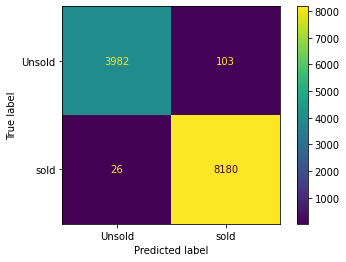

In [41]:
plot_confusion_matrix(nft_tree, train_conv_nft_df, y_train, include_values=True, display_labels=['Unsold', 'sold'])

In [42]:
param_dict = {
    'criterion':['entropy', 'gini'],
    'max_depth':range(1,10),
    'min_samples_split':range(1,10),
    'min_samples_leaf':range(1,5)
}

In [44]:
grid = GridSearchCV(nft_tree, param_grid=param_dict, cv=10, verbose=1, n_jobs=-1)
grid.fit(train_conv_nft_df, y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


/Users/mac/opt/anaconda3/envs/project_nft/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
720 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mac/opt/anaconda3/envs/project_nft/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mac/opt/anaconda3/envs/project_nft/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Users/mac/opt/anaconda3/envs/project_nft/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 250

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [45]:
grid.best_score_

0.9361324230817573

In [46]:
tuned_nft_tree = grid.best_estimator_

In [47]:
evaluate(tuned_nft_tree, train_conv_nft_df, y_train)

Training Scores:
Train Accuracy: 0.9561467740623221
Train precision: 0.9741496598639455
Train recall: 0.9597855227882037
**********


/Users/mac/opt/anaconda3/envs/project_nft/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


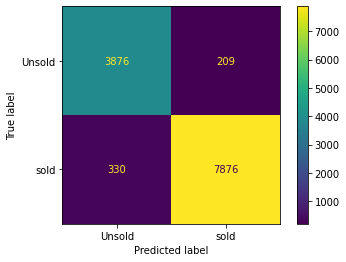

In [48]:
plot_confusion_matrix(tuned_nft_tree, train_conv_nft_df, y_train, include_values=True, display_labels=['Unsold', 'sold'])

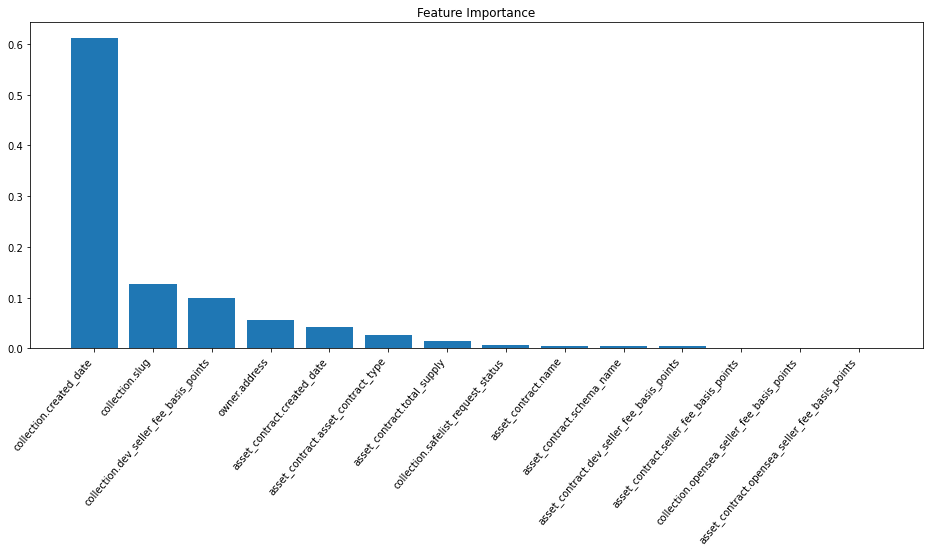

In [50]:
plot_feature_imp(tuned_nft_tree, train_conv_nft_df)

### Random Forest Classifier

In [51]:
nft_rand = RandomForestClassifier(random_state=42)
nft_rand.fit(train_conv_nft_df, y_train)

RandomForestClassifier(random_state=42)

In [53]:
cross_val_score(nft_rand, train_conv_nft_df, y_train, cv=5)

array([0.94753965, 0.94792514, 0.94792514, 0.93816111, 0.94873881])

In [54]:
params_nft ={'n_estimators': [100,200,400],'max_depth': [20,40,50,60]}

gs_rand_forest=RandomizedSearchCV(estimator= nft_rand,
               param_distributions= params_nft,
               cv=5)

gs_rand_forest.fit(train_conv_nft_df, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [20, 40, 50, 60],
                                        'n_estimators': [100, 200, 400]})

In [55]:
rand_nft = gs_rand_forest.best_estimator_

In [56]:
cross_val_score(rand_nft, train_conv_nft_df, y_train, cv=5)

array([0.94916633, 0.94955248, 0.94792514, 0.93938161, 0.94751831])

In [57]:
rand_nft.score(test_nft_df, y_test)

0.9216589861751152

In [58]:
evaluate(rand_nft, train_conv_nft_df, y_train)

Training Scores:
Train Accuracy: 0.9890163534293386
Train precision: 0.9862634052295457
Train recall: 0.9974408969047038
**********


/Users/mac/opt/anaconda3/envs/project_nft/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


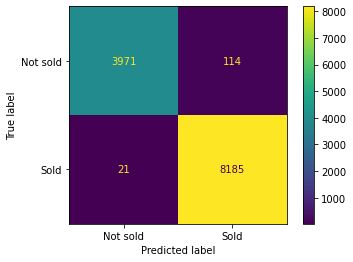

In [59]:
plot_confusion_matrix(rand_nft, train_conv_nft_df, y_train, include_values=True, display_labels=['Not sold', 'Sold'])

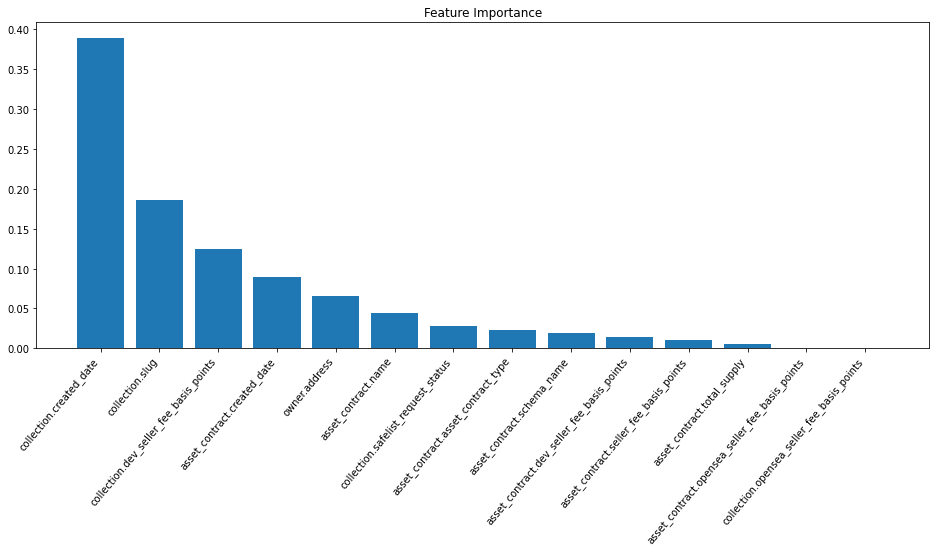

In [60]:
plot_feature_imp(rand_nft, train_conv_nft_df)

### Save model

In [62]:
import pickle

# save the model to disk
tree_model = '../models/real_model.sav'
pickle.dump(nft_tree, open(tree_model, 'wb'))